# A Look at James Hardens Early Carrer using Machine Learning

First, I will load and clean the data to make it easy to fit in modles and make adjustments. 

In [2]:
#Import dependencies
import pandas as pd
import os
import numpy as np

In [3]:
#Load dataset
dataset = pd.read_csv('harden.csv')

In [4]:
#Display of dataset
dataset.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,RESULT,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,10/28/2009,20-063,OKC,NaN,SAC,W (+13),0,12:59,...,2,2,0,0,0,0,3,5,3.8,-5
1,2,2,10/30/2009,20-065,OKC,@,DET,W (+8),0,16:38,...,1,2,8,0,0,0,3,2,3.6,17
2,3,3,11/1/2009,20-067,OKC,NaN,POR,L (-9),0,17:52,...,2,3,2,1,1,1,2,6,3.1,4
3,4,4,11/3/2009,20-069,OKC,NaN,LAL,L (-3),0,17:04,...,1,1,3,1,0,0,2,9,6.5,16
4,5,5,11/6/2009,20-072,OKC,@,HOU,L (-11),0,10:02,...,1,1,1,0,0,1,1,4,2.3,-8


In [5]:
#Import other dependencies 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
#Change the MP column to minutes and change its data type from object to float
time = dataset['MP'].str.split(':', expand=True).astype(float)
time_ = time[1] / 60
dataset['MINUTES'] = time[0] + time_

dataset.head(10)

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,RESULT,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,MINUTES
0,1,1,10/28/2009,20-063,OKC,NaN,SAC,W (+13),0,12:59,...,2,0,0,0,0,3,5,3.8,-5,12.983333
1,2,2,10/30/2009,20-065,OKC,@,DET,W (+8),0,16:38,...,2,8,0,0,0,3,2,3.6,17,16.633333
2,3,3,11/1/2009,20-067,OKC,NaN,POR,L (-9),0,17:52,...,3,2,1,1,1,2,6,3.1,4,17.866667
3,4,4,11/3/2009,20-069,OKC,NaN,LAL,L (-3),0,17:04,...,1,3,1,0,0,2,9,6.5,16,17.066667
4,5,5,11/6/2009,20-072,OKC,@,HOU,L (-11),0,10:02,...,1,1,0,0,1,1,4,2.3,-8,10.033333
5,6,6,11/8/2009,20-074,OKC,NaN,ORL,W (+28),0,19:13,...,4,5,2,0,0,3,5,7.8,0,19.216667
6,7,7,11/10/2009,20-076,OKC,@,SAC,L (-3),0,19:24,...,4,1,1,1,1,3,9,6.7,1,19.400000
7,8,8,11/11/2009,20-077,OKC,@,LAC,W (+4),0,23:54,...,5,8,1,1,2,1,7,8.6,9,23.900000
8,9,9,11/14/2009,20-080,OKC,@,SAS,W (+3),0,19:57,...,2,1,1,1,2,4,8,4.4,-3,19.950000
9,10,10,11/15/2009,20-081,OKC,NaN,LAC,L (-8),0,17:38,...,3,2,1,0,2,1,4,-0.3,-9,17.633333


In [7]:
#Changes the RESULT column removing the margin of victory to allow easier creation of classses 
df2 = dataset['RESULT']
p = df2.to_string()
l = p.split()
j = []
for k in range(1, len(l), 3):
    if 'W' or "L" in l[k]:
        if l[k] == "W": j.append("W");
        elif l[k] == "L": j.append("L")

In [8]:
#Add the RESULTS column to the dataset to reflect previous changes 
dataset["RESULTS"] = j
dataset.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,RESULT,GS,MP,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,MINUTES,RESULTS
0,1,1,10/28/2009,20-063,OKC,NaN,SAC,W (+13),0,12:59,...,0,0,0,0,3,5,3.8,-5,12.983333,W
1,2,2,10/30/2009,20-065,OKC,@,DET,W (+8),0,16:38,...,8,0,0,0,3,2,3.6,17,16.633333,W
2,3,3,11/1/2009,20-067,OKC,NaN,POR,L (-9),0,17:52,...,2,1,1,1,2,6,3.1,4,17.866667,L
3,4,4,11/3/2009,20-069,OKC,NaN,LAL,L (-3),0,17:04,...,3,1,0,0,2,9,6.5,16,17.066667,L
4,5,5,11/6/2009,20-072,OKC,@,HOU,L (-11),0,10:02,...,1,0,0,1,1,4,2.3,-8,10.033333,L


The next steps will include reviwing the data to make sure it will work with the models, and creating classes based on the resultof the game so the models have something to predict. 

In [9]:
#Filter dataset so that it only includes desired stats
dataset = dataset.filter(["MINUTES", 'PTS', "GmSc", 'RESULTS'])
dataset.head()

,MINUTES,PTS,GmSc,RESULTS
0,12.983333,5,3.8,W
1,16.633333,2,3.6,W
2,17.866667,6,3.1,L
3,17.066667,9,6.5,L
4,10.033333,4,2.3,L


In [10]:
#Review the datasets data types
dataset.dtypes

MINUTES    float64
PTS          int64
GmSc       float64
RESULTS     object
dtype: object

In [11]:
#Shape of Dataset
print(dataset.shape)

(452, 4)


In [12]:
#Desribe the datsaet 
print(dataset.describe())

          MINUTES         PTS        GmSc
count  452.000000  452.000000  452.000000
mean    32.336136   19.659292   15.094248
std      7.872553   10.196466    9.736714
min     10.033333    1.000000   -3.300000
25%     26.908333   12.000000    7.400000
50%     33.016667   18.000000   13.650000
75%     38.754167   27.000000   21.650000
max     47.933333   51.000000   44.500000


In [13]:
#class distribution
print(dataset.groupby('RESULTS').size())

RESULTS
L    159
W    293
dtype: int64


Now we will review the data with a few diffrent plots to see if something meaningful can come of the data as it is. 

C:\Users\Cody\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Cody\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Cody\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Cody\anaconda3\lib\site-packages\pandas\plotting\_matplotli

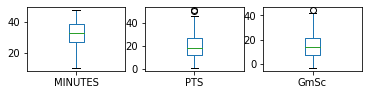

<Figure size 432x288 with 0 Axes>

In [31]:
#Box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()
pyplot.savefig('boxwhisker.png')

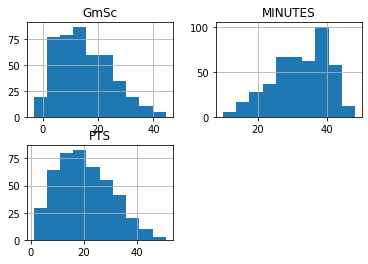

<Figure size 432x288 with 0 Axes>

In [33]:
#histograms
dataset.hist()
pyplot.show()
pyplot.savefig('histogram.png')

In [32]:
pwd

'C:\\Users\\Cody\\UCBE\\project-3'

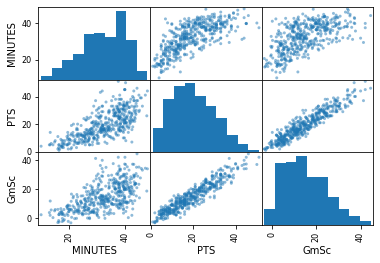

<Figure size 432x288 with 0 Axes>

In [34]:
#scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
pyplot.savefig('scattermatrix.png')

Now I will evalute diffrent machine learning models and evaluate which works best with the data. 

In [20]:
#split-out validation
array = dataset.values
X = array[:,0:3]
y =array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


In [28]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#evalute the models
results = []
names = []
for name, model in models: 
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.667542 (0.040592)
LDA: 0.662062 (0.013725)
KNN: 0.581811 (0.026667)
CART: 0.598478 (0.045874)
NB: 0.625951 (0.031343)
SVM: 0.612177 (0.015363)


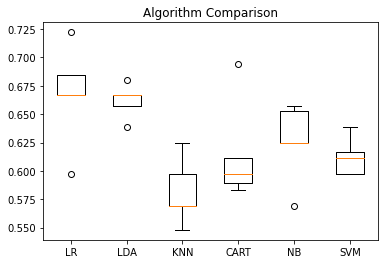

In [25]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Finally, I will run the chosen model on the data and print the results. 

In [26]:
#Predicitions
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [37]:
print(accuracy_score(Y_validation, predictions)),
print(confusion_matrix(Y_validation, predictions)),
print(classification_report(Y_validation, predictions))

0.7252747252747253
[[12 18]
 [ 7 54]]
              precision    recall  f1-score   support

           L       0.63      0.40      0.49        30
           W       0.75      0.89      0.81        61

    accuracy                           0.73        91
   macro avg       0.69      0.64      0.65        91
weighted avg       0.71      0.73      0.71        91



# In conclusion, the model was able to predict the outcome of the game to an accuracy of 73% based on Hardens minutes, points, and game score. I hope to improve on this model in the future to increase the accuracy and give more functionality. 